<a href="https://colab.research.google.com/github/JannaW0402/Pump-it-Up/blob/main/869danny.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

uploaded = files.upload()


Saving Train value with labels (1).csv to Train value with labels (1).csv


In [ ]:
import pandas as pd
import io

df = pd.read_csv(io.StringIO(uploaded['Train value with labels (1).csv'].decode('utf-8')))

In [ ]:
#Change all unknown permit to false
df['permit'].replace(['Unknown'],'False')

0        False
1         True
2         True
3         True
4         True
         ...  
59395     True
59396     True
59397    False
59398     True
59399     True
Name: permit, Length: 59400, dtype: object

In [ ]:
df['permit'].describe()

count     56344
unique        2
top        True
freq      38852
Name: permit, dtype: object

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [ ]:
sdf = df.sample(frac=0.1, replace=True, random_state=1)

In [ ]:
X = sdf.to_numpy()

In [ ]:
X.shape

(5940, 41)

<Figure size 432x288 with 0 Axes>

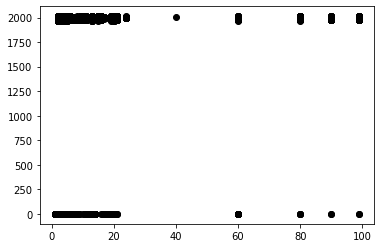

In [ ]:
plt.figure()
plt.scatter(X[:,13],X[:,23], c="black")

In [ ]:
n_features = df.shape[1]

cat_col_names = list(df.select_dtypes(include=np.object).columns)
num_col_names = list(df.select_dtypes(include=np.number).columns)

print('cat_col_names: {}'.format(cat_col_names))
print('num_col_names: {}'.format(num_col_names))

cat_col_names: ['date_recorded', 'funder', 'installer', 'wpt_name', 'basin', 'subvillage', 'region', 'lga', 'ward', 'public_meeting', 'recorded_by', 'scheme_management', 'scheme_name', 'permit', 'extraction_type', 'extraction_type_group', 'extraction_type_class', 'management', 'management_group', 'payment', 'payment_type', 'water_quality', 'quality_group', 'quantity', 'quantity_group', 'source', 'source_type', 'source_class', 'waterpoint_type', 'waterpoint_type_group', 'status_group']
num_col_names: ['id', 'amount_tsh', 'gps_height', 'longitude', 'latitude', 'num_private', 'region_code', 'district_code', 'population', 'construction_year']


In [ ]:
sdf.describe(include=[np.number]).transpose()


,count,mean,std,min,25%,50%,75%,max
id,5940.0,37015.020539,21634.795285,7.000000,18118.000000,37159.500000,55868.000000,7.423900e+04
amount_tsh,5940.0,286.051515,1887.029903,0.000000,0.000000,0.000000,20.000000,1.170000e+05
gps_height,5940.0,663.127609,693.261010,-53.000000,0.000000,354.000000,1319.000000,2.539000e+03
longitude,5940.0,34.032498,6.696751,0.000000,33.078938,34.883094,37.184736,4.034430e+01
latitude,5940.0,-5.682334,2.952066,-11.564509,-8.559185,-5.019712,-3.314560,-2.000000e-08
num_private,5940.0,0.501347,11.136322,0.000000,0.000000,0.000000,0.000000,7.550000e+02
region_code,5940.0,15.045455,17.118722,1.000000,5.000000,12.000000,17.000000,9.900000e+01
district_code,5940.0,5.474579,9.360735,0.000000,2.000000,3.000000,5.000000,6.300000e+01
population,5940.0,166.667340,394.148928,0.000000,0.000000,25.000000,210.000000,8.000000e+03
construction_year,5940.0,1290.541751,954.853807,0.000000,0.000000,1985.000000,2004.000000,2.013000e+03


In [ ]:
sdf.describe(include=[np.object]).transpose()


,count,unique,top,freq
date_recorded,5940,309,2011-03-17,66
funder,5586,618,Government Of Tanzania,893
installer,5581,654,DWE,1742
wpt_name,5940,4398,none,367
basin,5940,9,Lake Victoria,1064
subvillage,5891,3995,Majengo,54
region,5940,21,Iringa,543
lga,5940,124,Njombe,258
ward,5940,1614,Igosi,42
public_meeting,5595,2,True,5111


In [ ]:
from sklearn.preprocessing import StandardScaler

X_num = sdf[num_col_names].to_numpy()
X_cat = sdf[cat_col_names].to_numpy()

# Be sure to scale all numeric features
scaler = StandardScaler()
X_num = scaler.fit_transform(X_num)

X = np.concatenate((X_num, X_cat), axis=1)
X

array([[-1.1941964346496308, -0.15160098739124653, -0.9566143573358573,
        ..., 'communal standpipe multiple', 'communal standpipe',
        'non functional'],
       [-0.7434493503227688, -0.15160098739124653, -0.4805630914364927,
        ..., 'communal standpipe multiple', 'communal standpipe',
        'non functional'],
       [0.525446913114044, -0.15160098739124653, 1.7150430500751224, ...,
        'communal standpipe', 'communal standpipe', 'functional'],
       ...,
       [0.21249872719538382, -0.15160098739124653, 2.4060386754260183,
        ..., 'communal standpipe', 'communal standpipe', 'functional'],
       [0.29048153216507067, -0.15160098739124653, -0.9566143573358573,
        ..., 'communal standpipe multiple', 'communal standpipe',
        'functional'],
       [-1.2375099428041043, -0.15160098739124653, -0.9566143573358573,
        ..., 'hand pump', 'hand pump', 'functional']], dtype=object)

In [ ]:
from scipy.spatial import distance


def _validate_vector(u, dtype=None):
    # XXX Is order='c' really necessary?
    u = np.asarray(u, dtype=dtype, order='c').squeeze()
    # Ensure values such as u=1 and u=[1] still return 1-D arrays.
    u = np.atleast_1d(u)
    if u.ndim > 1:
        raise ValueError("Input vector should be 1-D.")
    return u


def danny_dist(u, v, p=2, w=None):
  print(u)
  u = _validate_vector(u)
  v = _validate_vector(v)
  if p < 1:
      raise ValueError("p must be at least 1")

  print(u)
  print(u)
  print(v)
  u_v = u - v
  if w is not None:
      w = _validate_weights(w)
      if p == 1:
          root_w = w
      if p == 2:
          # better precision and speed
          root_w = np.sqrt(w)
      else:
          root_w = np.power(w, 1/p)
      u_v = root_w * u_v
  dist = norm(u_v, ord=p)
  return dist


def custom_dist(x1,x2,cat_cols=None,num_cols=None):
  n = len(x1)
  #print(num_cols)
  #dist_num = danny_dist(x1[num_cols],x2[num_cols])
  dist_num = distance.euclidean(x1[num_cols],x2[num_cols])
  dist_cat = distance.hamming(x1[cat_cols],x2[cat_cols])
  dist=(dist_num*sum(num_cols) + dist_cat*sum(cat_cols)) / n
  return dist


In [ ]:
from scipy.spatial.distance import pdist

cat_cols = [type(x)==str for x in X[1,:]]
num_cols = [not x for x in cat_cols]

count=-1
for x in num_cols:
  count+=1
  if(x == True):
    print (x, count)

#num_cols = [(not x and type(x) == int) for x in cat_cols]

num_cols[19] = False
num_cols[22] = False
num_cols[23] = False
#print(num_cols)

Y = pdist(X, custom_dist, cat_cols=cat_cols, num_cols=num_cols)

True 0
True 1
True 2
True 3
True 4
True 5
True 6
True 7
True 8
True 9
True 19
True 23


In [ ]:
import scipy.cluster

aggl = scipy.cluster.hierarchy.linkage(Y, method='ward')

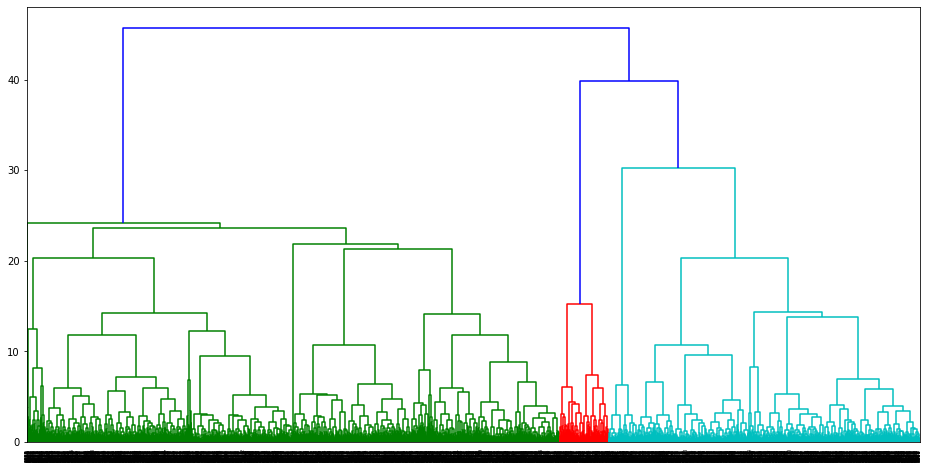

In [ ]:
plt.figure(figsize=(16, 8));
plt.grid(False)
dend = scipy.cluster.hierarchy.dendrogram(aggl);

In [ ]:
# Let's find K=5 clusters
K=5
labels = scipy.cluster.hierarchy.fcluster(aggl, K, criterion="maxclust")

In [ ]:
labels100 = scipy.cluster.hierarchy.fcluster(aggl, 100, criterion="maxclust")

In [ ]:
sdf['cluster100'] = labels100

In [ ]:
#Data repair based on clustering

#Repair construction year
#For each cluster, find the min year
#If construction year in cluster == 0
# Insert year

def replace_with_min_year (df, cluster_count, cluster_colname):
  missing = 0
  for i in range(cluster_count):
    current_cluster = df[df[cluster_colname] == i]
    current_cluster_with_construction_year = current_cluster[current_cluster['construction_year'] > 0]
    if len(current_cluster_with_construction_year) > 0:
      min_year = current_cluster_with_construction_year['construction_year'].min()
      df.loc[(df[cluster_colname] == i) & (df['construction_year'] == 0)] = min_year
    else:
      missing += len(current_cluster)
      print('no year in this cluster', i)

  print("total missing",missing)


replace_with_min_year(sdf,100,'cluster100')



no year in this cluster 0
no year in this cluster 56
no year in this cluster 57
no year in this cluster 65
no year in this cluster 73
no year in this cluster 74
no year in this cluster 75
no year in this cluster 76
no year in this cluster 77
no year in this cluster 78
no year in this cluster 79
no year in this cluster 80
no year in this cluster 81
no year in this cluster 82
no year in this cluster 83
no year in this cluster 86
no year in this cluster 87
no year in this cluster 88
no year in this cluster 89
no year in this cluster 90
no year in this cluster 91
no year in this cluster 92
no year in this cluster 93
no year in this cluster 94
no year in this cluster 95
no year in this cluster 96
no year in this cluster 97
no year in this cluster 98
no year in this cluster 99
total missing 1992


In [ ]:
labels

array([5, 1, 1, ..., 1, 5, 4], dtype=int32)

In [ ]:
sdf['cluster'] = labels

In [ ]:
group1 = sdf[sdf['cluster'] == 1]
group2 = sdf[sdf['cluster'] == 2]
group3 = sdf[sdf['cluster'] == 3]
group4 = sdf[sdf['cluster'] == 4]
group5 = sdf[sdf['cluster'] == 5]

In [ ]:
group1_with_construction_year = group1[group1['construction_year']>0] 
group2_with_construction_year = group2[group2['construction_year']>0] 
group3_with_construction_year = group3[group3['construction_year']>0] 
group4_with_construction_year = group4[group4['construction_year']>0] 
group5_with_construction_year = group5[group5['construction_year']>0] 

In [ ]:
group1_with_construction_year.describe()
group2_with_construction_year.describe()
group3_with_construction_year.describe()
group4_with_construction_year.describe()
group5_with_construction_year.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year,cluster
count,3500.00,3500.00,3500.00,3500.00,3500.00,3500.00,3500.00,3500.00,3500.00,3500.00,3500.00
mean,36781.95,470.42,1075.26,35.74,-5.96,0.54,9.65,3.16,251.92,1996.81,1.00
std,21537.13,2434.74,589.89,2.47,2.68,5.90,7.14,2.67,473.41,12.53,0.00
min,49.00,0.00,-50.00,29.61,-11.56,0.00,2.00,1.00,0.00,1960.00,1.00
25%,18055.00,0.00,584.50,34.60,-8.15,0.00,4.00,2.00,30.00,1988.00,1.00
50%,36951.00,0.00,1213.00,36.09,-5.25,0.00,10.00,3.00,145.00,2000.00,1.00
75%,54938.25,250.00,1512.00,37.56,-3.56,0.00,13.00,4.00,300.00,2008.00,1.00
max,74239.00,117000.00,2539.00,40.32,-1.11,160.00,99.00,62.00,8000.00,2013.00,1.00


,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year,cluster
count,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
mean,12724.00,20.00,175.00,38.78,-5.17,755.00,4.00,3.00,3000.00,2005.00,2.00
std,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
min,12724.00,20.00,175.00,38.78,-5.17,755.00,4.00,3.00,3000.00,2005.00,2.00
25%,12724.00,20.00,175.00,38.78,-5.17,755.00,4.00,3.00,3000.00,2005.00,2.00
50%,12724.00,20.00,175.00,38.78,-5.17,755.00,4.00,3.00,3000.00,2005.00,2.00
75%,12724.00,20.00,175.00,38.78,-5.17,755.00,4.00,3.00,3000.00,2005.00,2.00
max,12724.00,20.00,175.00,38.78,-5.17,755.00,4.00,3.00,3000.00,2005.00,2.00


,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year,cluster
count,305.00,305.00,305.00,305.00,305.00,305.00,305.00,305.00,305.00,305.00,305.00
mean,36362.99,83.34,170.29,39.16,-9.39,0.01,79.32,32.42,232.47,1996.55,3.00
std,21748.57,462.95,181.04,0.50,1.35,0.14,13.96,19.64,278.34,13.43,0.00
min,66.00,0.00,-53.00,37.71,-11.36,0.00,40.00,1.00,1.00,1962.00,3.00
25%,17918.00,0.00,24.00,38.92,-10.48,0.00,60.00,13.00,1.00,1985.00,3.00
50%,37161.00,0.00,110.00,39.11,-10.03,0.00,80.00,33.00,200.00,2002.00,3.00
75%,56440.00,25.00,307.00,39.41,-7.99,0.00,90.00,53.00,350.00,2008.00,3.00
max,73471.00,5000.00,731.00,40.34,-7.00,2.00,99.00,63.00,2000.00,2013.00,3.00


,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year,cluster
count,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
mean,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
std,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
min,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
25%,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
50%,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
75%,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
max,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year,cluster
count,33.00,33.00,33.00,33.00,33.00,33.00,33.00,33.00,33.00,33.00,33.00
mean,32307.18,13.18,1455.76,35.63,-3.42,0.00,24.00,30.00,544.58,2000.67,5.00
std,20784.95,11.31,186.89,0.14,0.11,0.00,0.00,0.00,591.02,5.79,0.00
min,1744.00,0.00,1036.00,35.33,-3.67,0.00,24.00,30.00,1.00,1994.00,5.00
25%,16472.00,10.00,1411.00,35.59,-3.52,0.00,24.00,30.00,150.00,1994.00,5.00
50%,27504.00,10.00,1502.00,35.63,-3.38,0.00,24.00,30.00,250.00,2002.00,5.00
75%,40737.00,10.00,1560.00,35.72,-3.33,0.00,24.00,30.00,600.00,2006.00,5.00
max,72523.00,50.00,1713.00,35.89,-3.25,0.00,24.00,30.00,2000.00,2012.00,5.00


In [ ]:
#group1_with_construction_year.min()
group2_with_construction_year['construction_year'].min()
#group3_with_construction_year.describe()
#group4_with_construction_year.describe()
#group5_with_construction_year.describe()

2005

In [ ]:
group4.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,cluster
7751,6794,0.00,2013-01-29,Dwsp,0,DWE,0.00,-0.00,Maji Ni Uhai,0,Lake Victoria,Magungulu,Shinyanga,17,1,Bariadi,Gamboshi,0,NaN,GeoData Consultants Ltd,WUG,NaN,False,0,nira/tanira,nira/tanira,handpump,wug,user-group,unknown,unknown,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional,4
24535,30945,0.00,2013-01-21,Dwsp,0,DWE,0.00,-0.00,Tupendane Wazee,0,Lake Victoria,Kabasa,Shinyanga,17,1,Bariadi,Mwamapalala,0,False,GeoData Consultants Ltd,WUG,NaN,False,0,swn 80,swn 80,handpump,wug,user-group,never pay,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional needs repair,4
2561,28210,0.00,2013-01-29,Wsdp & Sdg,0,DWE,0.00,-0.00,Baruasa,0,Lake Victoria,Budeka,Shinyanga,17,1,Bariadi,Bunamhala,0,False,GeoData Consultants Ltd,Water authority,NaN,False,0,other,other,other,water authority,commercial,pay monthly,monthly,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional,4
16926,59142,0.00,2012-10-04,Hesawa,0,DWR,0.00,-0.00,Kwa Shabi,0,Lake Victoria,Mwanoni,Mwanza,19,2,Magu,Nyaluhande,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,other,other,other,vwc,user-group,never pay,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,other,other,non functional,4
48835,70366,0.00,2012-12-16,Unicef,0,World bank,0.00,-0.00,Kwa Lugodisha,0,Lake Victoria,Kayenze,Mwanza,19,2,Magu,Kalemela,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,india mark ii,india mark ii,handpump,vwc,user-group,never pay,never pay,salty,salty,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional,4


In [ ]:
from scipy import stats
import seaborn as sns

pd.set_option("display.precision", 2)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

print('All Data:')
print('Number of Instances: {}'.format(X.shape[0]))
sdf.describe(include=[np.number]).transpose()
sdf.describe(include=[np.object]).transpose()
for col in cat_col_names:
    sdf[col].value_counts()


for i, label in enumerate(set(labels)):
    n = sdf.iloc[labels==label].shape[0]
      
    print('\nCluster {}:'.format(label))
    print('Number of Instances: {}'.format(n))

    sdf.iloc[labels==label].describe(include=[np.number]).transpose()
    sdf.iloc[labels==label].describe(include=[np.object]).transpose()
    for col in cat_col_names:
        sdf.iloc[labels==label][col].value_counts()

All Data:
Number of Instances: 5940


,count,mean,std,min,25%,50%,75%,max
id,5940.00,37015.02,21634.80,7.00,18118.00,37159.50,55868.00,74239.00
amount_tsh,5940.00,286.05,1887.03,0.00,0.00,0.00,20.00,117000.00
gps_height,5940.00,663.13,693.26,-53.00,0.00,354.00,1319.00,2539.00
longitude,5940.00,34.03,6.70,0.00,33.08,34.88,37.18,40.34
latitude,5940.00,-5.68,2.95,-11.56,-8.56,-5.02,-3.31,-0.00
num_private,5940.00,0.50,11.14,0.00,0.00,0.00,0.00,755.00
region_code,5940.00,15.05,17.12,1.00,5.00,12.00,17.00,99.00
district_code,5940.00,5.47,9.36,0.00,2.00,3.00,5.00,63.00
population,5940.00,166.67,394.15,0.00,0.00,25.00,210.00,8000.00
construction_year,5940.00,1290.54,954.85,0.00,0.00,1985.00,2004.00,2013.00


,count,unique,top,freq
date_recorded,5940,309,2011-03-17,66
funder,5586,618,Government Of Tanzania,893
installer,5581,654,DWE,1742
wpt_name,5940,4398,none,367
basin,5940,9,Lake Victoria,1064
subvillage,5891,3995,Majengo,54
region,5940,21,Iringa,543
lga,5940,124,Njombe,258
ward,5940,1614,Igosi,42
public_meeting,5595,2,True,5111


2011-03-17    66
2011-03-16    61
2013-01-29    59
2011-03-18    59
2011-03-15    59
              ..
2012-12-11     1
2012-12-23     1
2011-10-03     1
2012-12-21     1
2013-01-08     1
Name: date_recorded, Length: 309, dtype: int64

Government Of Tanzania    893
Danida                    303
Hesawa                    223
World Bank                156
Kkkt                      137
                         ... 
Summit For Water            1
Regwa Company Of Egypt      1
Waitaliano                  1
Ambwene Mwaikek             1
M And P                     1
Name: funder, Length: 618, dtype: int64

DWE                        1742
Government                  191
Commu                       118
RWE                         113
DANIDA                      106
                           ... 
GERMAN MISSIONSRY             1
DWE/Anglican church           1
CHINA HENAN CONSTUCTION       1
Village Government            1
RWSP                          1
Name: installer, Length: 654, dtype: int64

none             367
Shuleni          160
Zahanati          75
Msikitini         50
Ofisini           31
                ... 
Kwa Mama Anna      1
Kwa Suleimani      1
Kwa Kang`Anga      1
Kwa Haule          1
Kwa Abdallar       1
Name: wpt_name, Length: 4398, dtype: int64

Lake Victoria              1064
Pangani                     936
Rufiji                      794
Internal                    735
Lake Tanganyika             617
Wami / Ruvu                 596
Lake Nyasa                  542
Ruvuma / Southern Coast     411
Lake Rukwa                  245
Name: basin, dtype: int64

Majengo          54
Shuleni          49
Madukani         45
Kati             38
Muungano         26
                 ..
Igumbiro Kati     1
Kisangari         1
Kopiro            1
Kasanvu           1
Kwefivi           1
Name: subvillage, Length: 3995, dtype: int64

Iringa           543
Mbeya            479
Shinyanga        459
Kilimanjaro      457
Morogoro         364
Mwanza           338
Kagera           336
Arusha           326
Tanga            280
Pwani            268
Kigoma           266
Ruvuma           263
Dodoma           229
Tabora           208
Mara             208
Singida          200
Rukwa            168
Manyara          167
Mtwara           158
Lindi            143
Dar es Salaam     80
Name: region, dtype: int64

Njombe          258
Arusha Rural    125
Bariadi         124
Rungwe          121
Mbozi           114
               ... 
Kinondoni         7
Songea Urban      7
Moshi Urban       5
Arusha Urban      4
Lindi Urban       2
Name: lga, Length: 124, dtype: int64

Igosi        42
Chanika      24
Usuka        24
Nduruma      24
Imalinyi     23
             ..
Mkwedu        1
Bweni         1
Tawa          1
Ilagala       1
Kwamkonje     1
Name: ward, Length: 1614, dtype: int64

True     5111
False     484
Name: public_meeting, dtype: int64

GeoData Consultants Ltd    5940
Name: recorded_by, dtype: int64

VWC                 3687
WUG                  484
Water authority      326
WUA                  297
Water Board          275
Parastatal           153
Private operator     121
Company              106
Other                 80
Trust                 12
SWC                   11
Name: scheme_management, dtype: int64

K                            76
None                         71
Borehole                     60
M                            38
Chalinze wate                35
                             ..
Water AID                     1
image water supply scheme     1
Mradi wa maji wa litisha      1
Kilesi water supply           1
Magula mountains spr          1
Name: scheme_name, Length: 1141, dtype: int64

True     3887
False    1759
Name: permit, dtype: int64

gravity              2724
nira/tanira           772
other                 664
submersible           473
swn 80                334
mono                  266
india mark ii         243
afridev               212
ksb                   133
other - rope pump      52
other - swn 81         26
other - play pump       9
cemo                    9
windmill                8
walimi                  7
india mark iii          5
climax                  3
Name: extraction_type, dtype: int64

gravity            2724
nira/tanira         772
other               664
submersible         606
swn 80              334
mono                266
india mark ii       243
afridev             212
rope pump            52
other handpump       42
other motorpump      12
wind-powered          8
india mark iii        5
Name: extraction_type_group, dtype: int64

gravity         2724
handpump        1608
other            664
submersible      606
motorpump        278
rope pump         52
wind-powered       8
Name: extraction_type_class, dtype: int64

vwc                 4047
wug                  624
water board          283
wua                  259
private operator     212
parastatal           163
other                110
water authority       94
company               71
unknown               55
trust                 13
other - school         9
Name: management, dtype: int64

user-group    5213
commercial     390
parastatal     163
other          119
unknown         55
Name: management_group, dtype: int64

never pay                2523
pay per bucket            883
pay monthly               817
unknown                   774
pay when scheme fails     441
pay annually              391
other                     111
Name: payment, dtype: int64

never pay     2523
per bucket     883
monthly        817
unknown        774
on failure     441
annually       391
other          111
Name: payment_type, dtype: int64

soft                  5075
salty                  494
unknown                169
milky                   98
coloured                44
salty abandoned         40
fluoride                18
fluoride abandoned       2
Name: water_quality, dtype: int64

good        5075
salty        534
unknown      169
milky         98
colored       44
fluoride      20
Name: quality_group, dtype: int64

enough          3351
insufficient    1530
dry              589
seasonal         401
unknown           69
Name: quantity, dtype: int64

enough          3351
insufficient    1530
dry              589
seasonal         401
unknown           69
Name: quantity_group, dtype: int64

spring                  1726
shallow well            1670
machine dbh             1078
river                    949
rainwater harvesting     236
hand dtw                  95
lake                      83
dam                       82
other                     19
unknown                    2
Name: source, dtype: int64

spring                  1726
shallow well            1670
borehole                1173
river/lake              1032
rainwater harvesting     236
dam                       82
other                     21
Name: source_type, dtype: int64

groundwater    4569
surface        1350
unknown          21
Name: source_class, dtype: int64

communal standpipe             2877
hand pump                      1727
other                           632
communal standpipe multiple     617
improved spring                  76
cattle trough                    11
Name: waterpoint_type, dtype: int64

communal standpipe    3494
hand pump             1727
other                  632
improved spring         76
cattle trough           11
Name: waterpoint_type_group, dtype: int64

functional                 3307
non functional             2213
functional needs repair     420
Name: status_group, dtype: int64


Cluster 1:
Number of Instances: 3544


,count,mean,std,min,25%,50%,75%,max
id,3544.00,36820.35,21505.38,49.00,18101.50,36977.50,54983.50,74239.00
amount_tsh,3544.00,472.03,2421.63,0.00,0.00,0.00,250.00,117000.00
gps_height,3544.00,1080.61,590.07,-50.00,608.75,1219.00,1516.00,2539.00
longitude,3544.00,35.74,2.46,29.61,34.61,36.04,37.56,40.32
latitude,3544.00,-5.97,2.68,-11.56,-8.22,-5.28,-3.56,-1.11
num_private,3544.00,0.62,6.85,0.00,0.00,0.00,0.00,160.00
region_code,3544.00,9.66,7.11,2.00,4.00,10.00,13.00,99.00
district_code,3544.00,3.16,2.66,1.00,2.00,3.00,4.00,62.00
population,3544.00,249.77,471.48,0.00,30.00,140.00,300.00,8000.00
construction_year,3544.00,1972.02,221.49,0.00,1987.00,2000.00,2008.00,2013.00


,count,unique,top,freq
date_recorded,3544,260,2011-03-17,63
funder,3431,427,Government Of Tanzania,594
installer,3431,440,DWE,1079
wpt_name,3544,2616,none,345
basin,3544,9,Pangani,926
subvillage,3544,2424,Shuleni,32
region,3544,17,Iringa,543
lga,3544,81,Njombe,258
ward,3544,917,Igosi,42
public_meeting,3319,2,True,3037


2011-03-17    63
2011-03-16    56
2011-03-15    52
2011-03-13    46
2011-03-18    45
              ..
2012-12-13     1
2013-01-08     1
2011-04-21     1
2011-04-22     1
2012-11-30     1
Name: date_recorded, Length: 260, dtype: int64

Government Of Tanzania      594
Danida                      213
Unicef                       88
World Bank                   82
Hesawa                       77
                           ... 
Pmo                           1
Lotary International          1
Saleh Zaharani                1
Vifaf                         1
Village Water Commission      1
Name: funder, Length: 427, dtype: int64

DWE            1079
RWE              99
Government       96
DANIDA           77
0                74
               ... 
TASSAF/TCRS       1
SERONERA          1
Hanja Lt          1
villagers         1
Elina             1
Name: installer, Length: 440, dtype: int64

none                 345
Shuleni               94
Zahanati              47
Msikitini             22
School                18
                    ... 
Kwa Alfayo             1
Shambani               1
Kwa Hosia Nyimbo       1
Kwa Abdalah Abasi      1
Foresti                1
Name: wpt_name, Length: 2616, dtype: int64

Pangani                    926
Rufiji                     579
Wami / Ruvu                447
Internal                   423
Lake Tanganyika            340
Lake Nyasa                 289
Lake Victoria              257
Ruvuma / Southern Coast    188
Lake Rukwa                  95
Name: basin, dtype: int64

Shuleni        32
Madukani       30
Kati           29
Majengo        25
Muungano       20
               ..
Kishewa         1
Kagina          1
Kwalock         1
Mwakilihoma     1
Lobon           1
Name: subvillage, Length: 2424, dtype: int64

Iringa           543
Kilimanjaro      457
Morogoro         362
Arusha           292
Tanga            271
Kigoma           266
Ruvuma           262
Mara             208
Singida          200
Rukwa            168
Manyara          167
Pwani            163
Dar es Salaam     75
Mtwara            39
Mwanza            33
Lindi             24
Shinyanga         14
Name: region, dtype: int64

Njombe          258
Arusha Rural    125
Moshi Rural     111
Same            106
Kilosa          106
               ... 
Masasi            1
Ruangwa           1
Lindi Urban       1
Kilwa             1
Newala            1
Name: lga, Length: 81, dtype: int64

Igosi        42
Usuka        24
Nduruma      24
Imalinyi     23
Chalinze     22
             ..
Roche         1
Mchesi        1
Mtoa          1
Mbelekese     1
Kigunga       1
Name: ward, Length: 917, dtype: int64

True     3037
False     282
Name: public_meeting, dtype: int64

GeoData Consultants Ltd    3544
Name: recorded_by, dtype: int64

VWC                 2047
Water authority      258
WUA                  257
Water Board          251
WUG                  187
Company              103
Parastatal            90
Private operator      87
Other                 71
SWC                   11
Trust                  5
Name: scheme_management, dtype: int64

Borehole                               43
Government                             35
DANIDA                                 34
Chalinze wate                          34
wanging'ombe supply scheme             30
                                       ..
Imbaseny pumping water supply           1
Kiumba water supply                     1
Kakonko /Mbizi gravity water supply     1
Tengeru gravity water supply            1
Mago                                    1
Name: scheme_name, Length: 824, dtype: int64

True     2422
False     951
Name: permit, dtype: int64

gravity              1960
submersible           340
other                 319
nira/tanira           221
swn 80                206
india mark ii         128
mono                  113
afridev                96
ksb                    84
other - rope pump      43
other - swn 81         17
windmill                6
other - play pump       5
india mark iii          3
climax                  2
walimi                  1
Name: extraction_type, dtype: int64

gravity            1960
submersible         424
other               319
nira/tanira         221
swn 80              206
india mark ii       128
mono                113
afridev              96
rope pump            43
other handpump       23
wind-powered          6
india mark iii        3
other motorpump       2
Name: extraction_type_group, dtype: int64

gravity         1960
handpump         677
submersible      424
other            319
motorpump        115
rope pump         43
wind-powered       6
Name: extraction_type_class, dtype: int64

vwc                 2333
water board          267
wua                  225
wug                  217
private operator     153
parastatal            99
other                 71
company               70
water authority       62
unknown               32
other - school         9
trust                  6
Name: management, dtype: int64

user-group    3042
commercial     291
parastatal      99
other           80
unknown         32
Name: management_group, dtype: int64

never pay                1240
pay monthly               691
pay per bucket            552
unknown                   436
pay annually              301
pay when scheme fails     283
other                      41
Name: payment, dtype: int64

never pay     1240
monthly        691
per bucket     552
unknown        436
annually       301
on failure     283
other           41
Name: payment_type, dtype: int64

soft                  3106
salty                  270
unknown                101
coloured                22
salty abandoned         17
fluoride                14
milky                   13
fluoride abandoned       1
Name: water_quality, dtype: int64

good        3106
salty        287
unknown      101
colored       22
fluoride      15
milky         13
Name: quality_group, dtype: int64

enough          2086
insufficient     987
dry              263
seasonal         167
unknown           41
Name: quantity, dtype: int64

enough          2086
insufficient     987
dry              263
seasonal         167
unknown           41
Name: quantity_group, dtype: int64

spring                  1254
river                    719
shallow well             655
machine dbh              609
rainwater harvesting     130
hand dtw                  75
lake                      43
dam                       41
other                     16
unknown                    2
Name: source, dtype: int64

spring                  1254
river/lake               762
borehole                 684
shallow well             655
rainwater harvesting     130
dam                       41
other                     18
Name: source_type, dtype: int64

groundwater    2593
surface         933
unknown          18
Name: source_class, dtype: int64

communal standpipe             2077
hand pump                       766
communal standpipe multiple     357
other                           313
improved spring                  25
cattle trough                     6
Name: waterpoint_type, dtype: int64

communal standpipe    2434
hand pump              766
other                  313
improved spring         25
cattle trough            6
Name: waterpoint_type_group, dtype: int64

functional                 2083
non functional             1225
functional needs repair     236
Name: status_group, dtype: int64


Cluster 2:
Number of Instances: 1


,count,mean,std,min,25%,50%,75%,max
id,1.00,12724.00,nan,12724.00,12724.00,12724.00,12724.00,12724.00
amount_tsh,1.00,20.00,nan,20.00,20.00,20.00,20.00,20.00
gps_height,1.00,175.00,nan,175.00,175.00,175.00,175.00,175.00
longitude,1.00,38.78,nan,38.78,38.78,38.78,38.78,38.78
latitude,1.00,-5.17,nan,-5.17,-5.17,-5.17,-5.17,-5.17
num_private,1.00,755.00,nan,755.00,755.00,755.00,755.00,755.00
region_code,1.00,4.00,nan,4.00,4.00,4.00,4.00,4.00
district_code,1.00,3.00,nan,3.00,3.00,3.00,3.00,3.00
population,1.00,3000.00,nan,3000.00,3000.00,3000.00,3000.00,3000.00
construction_year,1.00,2005.00,nan,2005.00,2005.00,2005.00,2005.00,2005.00


,count,unique,top,freq
date_recorded,1,1,2011-03-12,1
funder,1,1,Government Of Tanzania,1
installer,1,1,DWE,1
wpt_name,1,1,Masimbani,1
basin,1,1,Pangani,1
subvillage,1,1,Masimbani,1
region,1,1,Tanga,1
lga,1,1,Muheza,1
ward,1,1,Mbaramo,1
public_meeting,1,1,True,1


2011-03-12    1
Name: date_recorded, dtype: int64

Government Of Tanzania    1
Name: funder, dtype: int64

DWE    1
Name: installer, dtype: int64

Masimbani    1
Name: wpt_name, dtype: int64

Pangani    1
Name: basin, dtype: int64

Masimbani    1
Name: subvillage, dtype: int64

Tanga    1
Name: region, dtype: int64

Muheza    1
Name: lga, dtype: int64

Mbaramo    1
Name: ward, dtype: int64

True    1
Name: public_meeting, dtype: int64

GeoData Consultants Ltd    1
Name: recorded_by, dtype: int64

VWC    1
Name: scheme_management, dtype: int64

Series([], Name: scheme_name, dtype: int64)

False    1
Name: permit, dtype: int64

nira/tanira    1
Name: extraction_type, dtype: int64

nira/tanira    1
Name: extraction_type_group, dtype: int64

handpump    1
Name: extraction_type_class, dtype: int64

vwc    1
Name: management, dtype: int64

user-group    1
Name: management_group, dtype: int64

pay per bucket    1
Name: payment, dtype: int64

per bucket    1
Name: payment_type, dtype: int64

salty    1
Name: water_quality, dtype: int64

salty    1
Name: quality_group, dtype: int64

enough    1
Name: quantity, dtype: int64

enough    1
Name: quantity_group, dtype: int64

shallow well    1
Name: source, dtype: int64

shallow well    1
Name: source_type, dtype: int64

groundwater    1
Name: source_class, dtype: int64

hand pump    1
Name: waterpoint_type, dtype: int64

hand pump    1
Name: waterpoint_type_group, dtype: int64

functional    1
Name: status_group, dtype: int64


Cluster 3:
Number of Instances: 329


,count,mean,std,min,25%,50%,75%,max
id,329.00,36239.53,21915.31,66.00,17757.00,36929.00,56440.00,73969.00
amount_tsh,329.00,77.42,446.20,0.00,0.00,0.00,20.00,5000.00
gps_height,329.00,161.22,181.77,-53.00,7.00,101.00,303.00,731.00
longitude,329.00,39.19,0.50,37.71,38.93,39.14,39.47,40.34
latitude,329.00,-9.34,1.35,-11.36,-10.45,-9.97,-7.92,-7.00
num_private,329.00,0.01,0.13,0.00,0.00,0.00,0.00,2.00
region_code,329.00,78.58,14.19,40.00,60.00,80.00,90.00,99.00
district_code,329.00,33.69,20.16,1.00,13.00,33.00,53.00,63.00
population,329.00,230.95,278.04,1.00,1.00,200.00,350.00,2000.00
construction_year,329.00,1850.91,520.16,0.00,1980.00,2000.00,2008.00,2013.00


,count,unique,top,freq
date_recorded,329,60,2013-01-24,16
funder,313,55,Government Of Tanzania,50
installer,313,60,DWE,50
wpt_name,329,261,Shuleni,18
basin,329,3,Ruvuma / Southern Coast,210
subvillage,329,243,Majengo,7
region,329,3,Mtwara,118
lga,329,13,Rufiji,51
ward,329,123,Vikindu,12
public_meeting,319,2,True,288


2013-01-24    16
2013-02-03    14
2013-01-29    14
2011-03-05    12
2011-02-28    11
2013-02-01    11
2013-02-08    11
2013-01-22    10
2013-02-02    10
2013-02-06     9
2011-02-23     9
2013-01-31     8
2013-01-23     8
2013-01-16     8
2011-02-22     8
2013-02-09     7
2011-02-24     7
2011-03-03     7
2013-02-04     7
2011-02-21     7
2013-01-21     7
2013-01-30     6
2011-03-02     6
2013-02-10     6
2013-02-15     6
2013-01-28     6
2013-02-07     6
2013-01-27     6
2011-02-19     6
2013-01-25     6
2011-03-04     5
2011-02-26     5
2013-01-26     5
2013-01-20     5
2013-02-05     4
2013-02-16     4
2013-01-17     3
2013-02-23     3
2011-03-06     3
2011-02-25     3
2013-02-12     3
2011-03-08     3
2013-01-18     3
2011-02-16     3
2013-02-18     2
2013-02-24     2
2011-02-17     2
2013-02-17     2
2011-02-20     2
2011-02-27     2
2013-02-11     1
2013-02-19     1
2013-02-14     1
2013-01-19     1
2013-03-04     1
2004-03-01     1
2013-02-13     1
2011-02-15     1
2011-03-07    

Government Of Tanzania         50
Fini Water                     28
Lga                            25
Unicef                         24
Amref                          19
Jaica                          18
Private                        14
Fw                             12
W.B                            10
World Bank                     10
Dwe                             9
Fin Water                       8
District Council                5
Finida German Tanzania Govt     5
Jica                            4
Lifetime                        4
Kuwait                          4
Lips                            4
Tasaf                           4
Songas                          4
Cspd                            4
Gen                             4
Cct                             3
Sabodo                          3
Father Bonifasi                 3
Asb                             2
Mchukwi Hos                     2
Roman Cathoric Church           2
Plan Int                        2
Finn Water    

DWE                          50
LGA                          28
Fini water                   20
Unisef                       19
JAICA                        13
AMREF                        13
District Council             13
Artisan                      12
FW                           12
FINI WATER                    8
Private                       8
Centr                         8
RDC                           7
FIN WATER                     7
Finwater                      6
Amref                         6
Jaica                         5
Government                    5
GEN                           4
KUWAIT                        4
Orien                         3
District water department     3
GOVERNMENT                    3
Ndanda missions               3
Sabodo                        3
TASAF                         3
Priva                         3
Songa                         3
Kokeni                        2
Makonde water supply          2
FINN WATER                    2
private 

Shuleni                    18
Msikitini                  16
Ofisini                     5
none                        4
Bombani                     4
                           ..
Mahakamani                  1
Nyanjati Primary School     1
Senta                       1
Cheboni                     1
Kwa Namalili                1
Name: wpt_name, Length: 261, dtype: int64

Ruvuma / Southern Coast    210
Rufiji                      88
Wami / Ruvu                 31
Name: basin, dtype: int64

Majengo        7
Shuleni        6
Mnazi Mmoja    4
Bondeni        4
Mkwajuni       4
              ..
Kidala         1
Nyipala        1
Plot           1
Kibe           1
Dihimba        1
Name: subvillage, Length: 243, dtype: int64

Mtwara    118
Lindi     108
Pwani     103
Name: region, dtype: int64

Rufiji          51
Mtwara Rural    48
Kilwa           43
Masasi          36
Lindi Rural     34
Mkuranga        30
Ruangwa         19
Nanyumbu        17
Newala          17
Mafia           15
Liwale          11
Kisarawe         7
Lindi Urban      1
Name: lga, dtype: int64

Vikindu       12
Kipatimu      10
Nyengedi       7
Kilindoni      7
Mayanga        6
              ..
Miteja         1
Sindano        1
Mnyambe        1
Songosongo     1
Liwale A       1
Name: ward, Length: 123, dtype: int64

True     288
False     31
Name: public_meeting, dtype: int64

GeoData Consultants Ltd    329
Name: recorded_by, dtype: int64

VWC                 233
Private operator     20
Trust                 4
WUA                   4
Water Board           1
Company               1
WUG                   1
Parastatal            1
Other                 1
Name: scheme_management, dtype: int64

Mbuo mkunwa water supply      11
Mitema                         7
MWS                            6
JAICA Borehole Scheme          6
LIPS Water Scheme              4
GEN Borehole Scheme            4
Sabodo Borehole Scheme         3
Michenga                       3
Dihimba water supply           3
Kitere water supply            3
Mtandao wa Mabomba             2
Mtiniko water supply           2
Vianzi Water Supply            2
Lipumburu Water                2
Mnyawi water supply            2
Nyangao Water Supply           2
Kandawale Water supply         2
Riv                            2
Rondo Water Supply             2
Ilala water supply             2
Luchelengwa                    2
Mbawala chini water supply     2
Mitema /MWS                    1
Vikindu Water Supply           1
Nahukahuka Water Supply        1
Likawage Water supply          1
Namajani                       1
Arusha chini water supply      1
Kilimahewa water supply        1
FW                             1
Nyangamala

True     212
False    117
Name: permit, dtype: int64

other                83
submersible          65
mono                 38
gravity              38
nira/tanira          36
india mark ii        30
afridev              21
ksb                  12
swn 80                3
india mark iii        1
other - rope pump     1
other - play pump     1
Name: extraction_type, dtype: int64

other             83
submersible       77
mono              38
gravity           38
nira/tanira       36
india mark ii     30
afridev           21
swn 80             3
other handpump     1
india mark iii     1
rope pump          1
Name: extraction_type_group, dtype: int64

handpump       92
other          83
submersible    77
gravity        38
motorpump      38
rope pump       1
Name: extraction_type_class, dtype: int64

vwc                 285
private operator     22
other                 6
trust                 5
wua                   4
wug                   2
unknown               2
parastatal            2
water board           1
Name: management, dtype: int64

user-group    292
commercial     27
other           6
parastatal      2
unknown         2
Name: management_group, dtype: int64

never pay         159
pay per bucket    102
unknown            54
pay monthly        10
pay annually        2
other               2
Name: payment, dtype: int64

never pay     159
per bucket    102
unknown        54
monthly        10
annually        2
other           2
Name: payment_type, dtype: int64

soft               249
salty               66
milky                9
unknown              3
coloured             1
salty abandoned      1
Name: water_quality, dtype: int64

good       249
salty       67
milky        9
unknown      3
colored      1
Name: quality_group, dtype: int64

enough          196
dry              64
insufficient     55
seasonal         11
unknown           3
Name: quantity, dtype: int64

enough          196
dry              64
insufficient     55
seasonal         11
unknown           3
Name: quantity_group, dtype: int64

machine dbh             148
shallow well            123
spring                   31
river                    12
rainwater harvesting      8
other                     3
dam                       2
hand dtw                  2
Name: source, dtype: int64

borehole                150
shallow well            123
spring                   31
river/lake               12
rainwater harvesting      8
other                     3
dam                       2
Name: source_type, dtype: int64

groundwater    304
surface         22
unknown          3
Name: source_class, dtype: int64

hand pump                      96
communal standpipe             84
other                          84
communal standpipe multiple    64
improved spring                 1
Name: waterpoint_type, dtype: int64

communal standpipe    148
hand pump              96
other                  84
improved spring         1
Name: waterpoint_type_group, dtype: int64

non functional             195
functional                 120
functional needs repair     14
Name: status_group, dtype: int64


Cluster 4:
Number of Instances: 190


,count,mean,std,min,25%,50%,75%,max
id,190.00,37003.59,22112.14,50.00,18410.50,34200.00,58040.75,74164.00
amount_tsh,190.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
gps_height,190.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
longitude,190.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
latitude,190.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00
num_private,190.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
region_code,190.00,17.78,0.98,17.00,17.00,17.00,19.00,19.00
district_code,190.00,2.42,2.14,1.00,1.00,1.00,6.00,6.00
population,190.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
construction_year,190.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


,count,unique,top,freq
date_recorded,190,67,2013-02-04,10
funder,187,30,Dwsp,42
installer,187,24,DWE,112
wpt_name,190,143,none,8
basin,190,2,Lake Victoria,180
subvillage,190,161,Madukani,5
region,190,2,Shinyanga,110
lga,190,3,Bariadi,110
ward,190,53,Chinamili,15
public_meeting,151,2,True,136


2013-02-04    10
2012-10-26     9
2011-07-18     9
2012-10-24     7
2013-01-30     7
              ..
2013-01-22     1
2011-07-25     1
2013-02-27     1
2011-08-12     1
2011-08-21     1
Name: date_recorded, Length: 67, dtype: int64

Dwsp                        42
Hesawa                      27
Government Of Tanzania      25
Rwssp                       22
Lwi                         14
Wsdp                         9
Wvt                          7
Dwssp                        6
Jica                         5
Unicef                       4
Tasaf                        3
Sdg                          2
Kmcl                         2
Holland                      2
Wsdp & Sdg                   2
World Bank                   1
Aic                          1
Dassip                       1
Lwi & Central Government     1
Dasip                        1
Plan International           1
Ridep                        1
Elct                         1
Private Individual           1
Lidep                        1
Jimbo Fund                   1
Pmo                          1
Nrwssp                       1
Caritas                      1
Tanapa                       1
Name: funder, dtype: int64

DWE                   112
Government             19
LWI                    14
WVT                     7
RWE                     5
JICA                    5
Hesawa                  4
TASAF                   3
KMCL                    2
HOLLAND                 2
HESAWA                  1
DALDO                   1
ELCT                    1
DASIP                   1
AIC                     1
Maswi company           1
TANAPA                  1
World bank              1
Plan Internationa       1
CARITAS                 1
Local technitian        1
DWR                     1
DWE & LWI               1
Central government      1
Name: installer, dtype: int64

none        8
Bombani     7
Muungano    5
Mkombozi    5
Upendo      5
           ..
Budagala    1
Faraji      1
Ushirika    1
Kitula      1
Pastor      1
Name: wpt_name, Length: 143, dtype: int64

Lake Victoria      180
Lake Tanganyika     10
Name: basin, dtype: int64

Madukani               5
Mwamijondo             4
Bubale                 3
Isanga                 3
Nyanza                 3
                      ..
Mwanza                 1
Kasoli A               1
Mwabuma                1
Mwamabu Bupandagila    1
Mwamahala              1
Name: subvillage, Length: 161, dtype: int64

Shinyanga    110
Mwanza        80
Name: region, dtype: int64

Bariadi    110
Geita       49
Magu        31
Name: lga, dtype: int64

Chinamili            15
Nkololo              13
Kalangalala          10
Sakwe                10
Bumera               10
Nyang'hwale           7
Somanda               7
Nkoma                 7
Sapiwi                6
Nkungulu              6
Kasoli                5
Mwadobana             4
Malili                4
Mwamapalala           4
Mwaubingi             4
Bukoli                4
Lugulu                4
Kharumwa              4
Bunamhala             3
Nyachiluluma          3
Kakora                3
Katoro                3
Mwaswale              3
Kalemela              3
Mwananyili            3
Kamena                3
Dutwa                 3
Igalukilo             3
Kamhanga              2
Zagayu                2
Badugu                2
Nyaluhande            2
Chigunga              2
Shigala               2
Mkula                 2
Mbita                 2
Nyakabindi            2
Kiloleli              2
Lubanga               2
Mhango                1
Sagata                1
Kabita          

True     136
False     15
Name: public_meeting, dtype: int64

GeoData Consultants Ltd    190
Name: recorded_by, dtype: int64

WUG                102
VWC                 67
Parastatal          11
Water authority      2
Name: scheme_management, dtype: int64

Borehole                 13
Nyamtukuza                9
Ngasamo Water Supply      3
Nyakagomba                3
Katoro                    2
Kalemela Water Supply     2
Nyang'hwale               2
Nungwe                    1
Nyashimo                  1
Tambukaleri               1
Nyaluhande                1
Kalangalala               1
Name: scheme_name, dtype: int64

False    117
True      73
Name: permit, dtype: int64

nira/tanira       88
other             23
india mark ii     17
swn 80            16
gravity           15
afridev            9
ksb                8
submersible        5
mono               4
walimi             4
india mark iii     1
Name: extraction_type, dtype: int64

nira/tanira       88
other             23
india mark ii     17
swn 80            16
gravity           15
submersible       13
afridev            9
mono               4
other handpump     4
india mark iii     1
Name: extraction_type_group, dtype: int64

handpump       135
other           23
gravity         15
submersible     13
motorpump        4
Name: extraction_type_class, dtype: int64

wug                102
vwc                 74
parastatal          11
water authority      2
unknown              1
Name: management, dtype: int64

user-group    176
parastatal     11
commercial      2
unknown         1
Name: management_group, dtype: int64

never pay                100
unknown                   54
other                     15
pay monthly               10
pay when scheme fails      6
pay per bucket             4
pay annually               1
Name: payment, dtype: int64

never pay     100
unknown        54
other          15
monthly        10
on failure      6
per bucket      4
annually        1
Name: payment_type, dtype: int64

soft               147
unknown             22
salty abandoned     15
salty                5
milky                1
Name: water_quality, dtype: int64

good       147
unknown     22
salty       20
milky        1
Name: quality_group, dtype: int64

enough          108
insufficient     48
dry              23
seasonal          9
unknown           2
Name: quantity, dtype: int64

enough          108
insufficient     48
dry              23
seasonal          9
unknown           2
Name: quantity_group, dtype: int64

shallow well            136
machine dbh              21
lake                     20
rainwater harvesting     10
spring                    3
Name: source, dtype: int64

shallow well            136
borehole                 21
river/lake               20
rainwater harvesting     10
spring                    3
Name: source_type, dtype: int64

groundwater    160
surface         30
Name: source_class, dtype: int64

hand pump                      140
communal standpipe              22
other                           15
communal standpipe multiple     13
Name: waterpoint_type, dtype: int64

hand pump             140
communal standpipe     35
other                  15
Name: waterpoint_type_group, dtype: int64

functional                 97
non functional             50
functional needs repair    43
Name: status_group, dtype: int64


Cluster 5:
Number of Instances: 1876


,count,mean,std,min,25%,50%,75%,max
id,1876.00,37532.89,21785.55,7.00,18360.00,37995.50,56841.50,74236.00
amount_tsh,1876.00,0.41,3.52,0.00,0.00,0.00,0.00,50.00
gps_height,1876.00,29.89,197.66,-46.00,0.00,0.00,0.00,1713.00
longitude,1876.00,33.35,1.61,30.46,32.43,33.21,33.88,40.11
latitude,1876.00,-5.08,2.76,-10.75,-8.55,-4.11,-2.88,-1.00
num_private,1876.00,0.01,0.37,0.00,0.00,0.00,0.00,16.00
region_code,1876.00,13.80,5.65,1.00,12.00,14.00,18.00,24.00
district_code,1876.00,5.22,6.46,0.00,2.00,4.00,6.00,30.00
population,1876.00,13.77,119.35,0.00,0.00,0.00,0.00,2000.00
construction_year,1876.00,35.19,263.07,0.00,0.00,0.00,0.00,2012.00


,count,unique,top,freq
date_recorded,1876,207,2011-04-17,39
funder,1654,214,Government Of Tanzania,223
installer,1649,225,DWE,500
wpt_name,1876,1556,Shuleni,47
basin,1876,9,Lake Victoria,627
subvillage,1827,1369,Majengo,21
region,1876,14,Mbeya,479
lga,1876,51,Rungwe,121
ward,1876,579,Rusumo,15
public_meeting,1805,2,True,1649


2011-04-17    39
2011-07-29    35
2011-07-20    34
2011-07-23    31
2011-07-30    29
              ..
2011-02-28     1
2013-03-19     1
2012-10-30     1
2011-03-06     1
2011-08-28     1
Name: date_recorded, Length: 207, dtype: int64

Government Of Tanzania    223
Hesawa                    119
Rwssp                     103
Danida                     90
World Vision               89
                         ... 
Bukwang Church Saint        1
Village Government          1
Vw                          1
Council                     1
Tom                         1
Name: funder, Length: 214, dtype: int64

DWE                   500
KKKT                   79
Government             71
Central government     53
Hesawa                 51
                     ... 
Water  Aid/Sema         1
Nathal Hamadi           1
GEOTAN                  1
hesawa                  1
Tom                     1
Name: installer, Length: 225, dtype: int64

Shuleni                  47
Zahanati                 25
Kanisani                 12
Msikitini                12
none                     10
                         ..
Mwabayanda                1
Kwa Ng'Ingo               1
Kares                     1
Kwa Mzee Atilio Tonga     1
Semchoko                  1
Name: wpt_name, Length: 1556, dtype: int64

Lake Victoria              627
Internal                   312
Lake Tanganyika            267
Lake Nyasa                 253
Lake Rukwa                 150
Rufiji                     127
Wami / Ruvu                118
Ruvuma / Southern Coast     13
Pangani                      9
Name: basin, dtype: int64

Majengo      21
1            14
Shuleni      10
Kati          8
Madukani      8
             ..
Chiyanga      1
Ukenyenge     1
Kigusha       1
Isevia        1
Itotowe       1
Name: subvillage, Length: 1369, dtype: int64

Mbeya            479
Kagera           336
Shinyanga        335
Dodoma           229
Mwanza           225
Tabora           208
Arusha            34
Lindi             11
Tanga              8
Dar es Salaam      5
Morogoro           2
Pwani              2
Ruvuma             1
Mtwara             1
Name: region, dtype: int64

Rungwe             121
Mbozi              114
Kahama              94
Karagwe             83
Kyela               78
Ngara               76
Maswa               75
Kwimba              70
Nzega               63
Mbarali             59
Mpwapwa             56
Bukoba Rural        54
Magu                54
Kondoa              52
Mbeya Rural         52
Shinyanga Rural     50
Kongwa              49
Sengerema           46
Bukombe             41
Urambo              41
Igunga              40
Missungwi           39
Biharamulo          35
Uyui                34
Karatu              33
Meatu               33
Dodoma Urban        33
Muleba              31
Chunya              29
Kishapu             28
Chamwino            27
Misenyi             26
Ileje               26
Chato               23
Ilemela             16
Sikonge             16
Shinyanga Urban     14
Tabora Urban        14
Bahi                12
Nachingwea          11
Bukoba Urban         8
Ilala                5
Pangani              5
Handeni    

Rusumo        15
Tinde         14
Itete         14
Rujewa        13
Nyimbili      13
              ..
Sigili         1
Kasharu        1
Mphwayungu     1
Kagondo        1
Lutende        1
Name: ward, Length: 579, dtype: int64

True     1649
False     156
Name: public_meeting, dtype: int64

GeoData Consultants Ltd    1876
Name: recorded_by, dtype: int64

VWC                 1339
WUG                  194
Water authority       66
Parastatal            51
WUA                   36
Water Board           23
Private operator      14
Other                  8
Trust                  3
Company                2
Name: scheme_management, dtype: int64

K                              70
None                           68
Ngana water supplied scheme    27
Makwale water supplied sche    14
N                              14
                               ..
Zois                            1
Kumsasa spring source           1
Mwit                            1
Busulwa                         1
Handeni Trunk Main(H            1
Name: scheme_name, Length: 276, dtype: int64

True     1180
False     573
Name: permit, dtype: int64

gravity              711
nira/tanira          426
other                239
mono                 111
swn 80               109
afridev               86
india mark ii         68
submersible           63
ksb                   29
other - swn 81         9
cemo                   9
other - rope pump      8
other - play pump      3
windmill               2
walimi                 2
climax                 1
Name: extraction_type, dtype: int64

gravity            711
nira/tanira        426
other              239
mono               111
swn 80             109
submersible         92
afridev             86
india mark ii       68
other handpump      14
other motorpump     10
rope pump            8
wind-powered         2
Name: extraction_type_group, dtype: int64

gravity         711
handpump        703
other           239
motorpump       121
submersible      92
rope pump         8
wind-powered      2
Name: extraction_type_class, dtype: int64

vwc                 1354
wug                  303
parastatal            51
private operator      37
other                 33
wua                   30
water authority       30
unknown               20
water board           15
trust                  2
company                1
Name: management, dtype: int64

user-group    1702
commercial      70
parastatal      51
other           33
unknown         20
Name: management_group, dtype: int64

never pay                1024
unknown                   230
pay per bucket            224
pay when scheme fails     152
pay monthly               106
pay annually               87
other                      53
Name: payment, dtype: int64

never pay     1024
unknown        230
per bucket     224
on failure     152
monthly        106
annually        87
other           53
Name: payment_type, dtype: int64

soft                  1573
salty                  152
milky                   75
unknown                 43
coloured                21
salty abandoned          7
fluoride                 4
fluoride abandoned       1
Name: water_quality, dtype: int64

good        1573
salty        159
milky         75
unknown       43
colored       21
fluoride       5
Name: quality_group, dtype: int64

enough          960
insufficient    440
dry             239
seasonal        214
unknown          23
Name: quantity, dtype: int64

enough          960
insufficient    440
dry             239
seasonal        214
unknown          23
Name: quantity_group, dtype: int64

shallow well            755
spring                  438
machine dbh             300
river                   218
rainwater harvesting     88
dam                      39
lake                     20
hand dtw                 18
Name: source, dtype: int64

shallow well            755
spring                  438
borehole                318
river/lake              238
rainwater harvesting     88
dam                      39
Name: source_type, dtype: int64

groundwater    1511
surface         365
Name: source_class, dtype: int64

hand pump                      724
communal standpipe             694
other                          220
communal standpipe multiple    183
improved spring                 50
cattle trough                    5
Name: waterpoint_type, dtype: int64

communal standpipe    877
hand pump             724
other                 220
improved spring        50
cattle trough           5
Name: waterpoint_type_group, dtype: int64

functional                 1006
non functional              743
functional needs repair     127
Name: status_group, dtype: int64

In [ ]:
from scipy import stats
import seaborn as sns

df = sdf

f, axes = plt.subplots(K, n_features, figsize=(24, 12), sharex='col', sharey='col')

cols = [x for x in num_col_names]
cols += [x for x in cat_col_names]
rows = ['Cluster {}'.format(i+1) for i in np.arange(K)]


for i, label in enumerate(set(labels)):
    n = df.iloc[labels==label].shape[0]
  

    col_idx = 0
    for col in num_col_names:
        sns.distplot(df[[col]], hist=False, rug=False, label="All", ax=axes[i-1, col_idx]);
        chart = sns.distplot(df.iloc[labels==label][[col]], hist=False, rug=False, label="Cluster {}".format(label), ax=axes[i-1,col_idx]);
        chart.set_yticklabels([])
        col_idx=col_idx+1
    for col in cat_col_names:
        
        # It's a bit complicated, and it took me a while to figure out, but what we're doing here is this:
        # Finding out the (normalized) distribution of each level for "all data"
        # Finding out the (normalized) distribution fo each level for this cluster
        # Plotting both on a bar chart
        
        all_prop_df = (df[col].value_counts(normalize=True).reset_index())
        all_prop_df['Cluster']= 'All'

        prop_df = (df.iloc[labels==label][col]
           .value_counts(normalize=True)
           .reset_index())

        prop_df['Cluster']= 'Cluster {}'.format(label)

        prop_df = pd.concat([all_prop_df, prop_df])
        prop_df = prop_df.reset_index(drop=True)

        chart = sns.barplot(x='index', y=col, hue='Cluster', data=prop_df, ci=None, ax=axes[i-1, col_idx])
        #chart.set_xticklabels(chart.get_xticklabels(), rotation=55)
        
        col_idx=col_idx+1

for ax1 in axes:
    for ax in ax1:
        ax.get_legend().remove()
        ax.set_ylabel('')
        ax.set_xlabel('')
        
for ax, col in zip(axes[0], cols):
    ax.set_title(col, size='large')

for ax, row in zip(axes[:,0], rows):
    ax.set_ylabel(row, rotation=90, size='large')

for j in np.arange(n_features):
    ax = axes[K-1,j]
    if j >= len(num_col_names): #Tmp hack to avoid rotating numeric lablels
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    
plt.show();

KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7f199da0fdd0> (for post_execute):


KeyboardInterrupt: ignored